In [19]:
here::i_am("code/init.r")
library(here)
# options(max.print = 10000)
library(tidyverse)
library("writexl")
library("stopwords")

# Text analyses packages
# https://quanteda.io/articles/quickstart.html
# library("spacyr")
# spacy_install()
# conda activate spacy_condaenv
# Sys.setenv(RETICULATE_PYTHON = "/Users/knguyen/opt/miniconda3/envs/spacy_condaenv/bin/python")
# spacy_initialize()
# spacy_download_langmodel("de_core_news_sm")
# https://spacy.io/models/de#de_dep_news_trf
# library("quanteda")
library(magrittr)
devtools::load_all("~/Code/R/ktools/")
library(quanteda)

here() starts at /Users/knguyen/Documents/WIP/Papers/Astrid

ℹ Loading ktools
ℹ Re-compiling ktools (debug build)



── R CMD INSTALL ───────────────────────────────────────────────────────────────
* installing *source* package ‘ktools’ ...
** using staged installation
** libs
* DONE (ktools)


In [20]:
Sys.getlocale()
Sys.setlocale("LC_ALL", "de_DE.UTF-8")
Sys.getlocale()

[1] "de_DE.UTF-8/de_DE.UTF-8/de_DE.UTF-8/C/de_DE.UTF-8/C"

[1] "de_DE.UTF-8/de_DE.UTF-8/de_DE.UTF-8/C/de_DE.UTF-8/C"

[1] "de_DE.UTF-8/de_DE.UTF-8/de_DE.UTF-8/C/de_DE.UTF-8/C"

Read forum data

In [21]:
#' # Read and basic processing
forum <- readRDS(here("data/forum.rds"))

# Save and export

In [6]:
# save if needed for Astrid
# forum <- list.files(here("data/new")) |>
#     map_dfr(\(x) read_csv(here('data/new', x))) |>
#     mutate(
#         date = gsub(',', '', date),
#         date = as.Date(date, '%d.%m.%Y')
#     )
# saveRDS(forum, here('data/forum.rds'))

forum %>%
    mutate(pmid = gsub("post_message_", "", mid), pmid = as.numeric(pmid)) %>%
    arrange(pmid) %>%
    mutate(text = paste0(date, ' | ', time, ' | ', text)) %>%
    select(pmid, user, date, time, text, emoji, user_quoted, quoted_text) %>%
    writexl::write_xlsx(here("data/forum_new_nina.xlsx"),)
    # write.csv(here("data", "forum_neue.txt"), fileEncoding = "UTF-8")

# writexl::write_xlsx(forum, here('data/forum.xlsx'))

In [22]:
forum %<>%
    rename(id = X1) %>% 
    mutate(id = gsub('post_message_', '', mid)) %>% 
    arrange(id)

forum metadata

In [9]:
forum %>% 
    select(id, user, date) %>% 
    mutate(text = paste0('text', 1:n())) %>% 
    allot(forum_meta)

In [13]:
# Document featureso
tk <- tokens(
    forum$text, 
    remove_punct = TRUE, 
    remove_numbers = TRUE,
    remove_symbols = TRUE, 
    remove_url = T
) %>%
    tokens_remove(
        stopwords("de", source = "stopwords-iso"))

Warning message:
“NA is replaced by empty string”


Recode and long form - 30s

In [14]:
# Document featureso
tk <- tokens(
    forum$text, 
    remove_punct = TRUE, 
    remove_numbers = TRUE,
    remove_symbols = TRUE, 
    remove_url = T
) %>%
    tokens_remove(
        stopwords("de", source = "stopwords-iso")
    )

tk <- lapply(tk, function(x) tolower(x)) %>% as.tokens()

# Docuement features matrix
dfmat <- dfm(tk)

dim(dfmat)
nrow(forum)

# Token long form - this is slow
tk_long <- purrr::map_dfr(
    names(tk), 
    function(x) bind_cols(text = x, as_tibble(tk[[x]])))

tk_long %>%
    rename(word = value) %>%  
    allot(tk_long)

Warning message:
“NA is replaced by empty string”


[1] 11261 40228

[1] 11261

In [15]:
forum

id,user,date,time,mid,text,emoji,user_quoted,quoted_text
<chr>,<chr>,<date>,<time>,<chr>,<chr>,<chr>,<chr>,<chr>
34705014,BRIGITTE Community-Team,2020-06-02,12:24:00,post_message_34705014,"Liebe User*innen,neben Fragen der Kinderbetreuung, Kitas oder Home-Schooling soll hier auch Platz für weitere Familienthemen wie z.B. den Umgang mit An gehörigen in Seniorenheimen sein.Hierkönnen Sie sehen, welchen bisherigen Themen in diesem neuen Thema aufgehenWir wünschen Ihnen spannende Diskussionen.Viele Grüßevom BRIGITTE Community-Team",NA,NA,NA
34705172,BRIGITTE Community-Team,2020-06-02,14:19:00,post_message_34705172,"Da das Thema durch den Umbau weiter nach hinten gerutscht ist, schieben wir es auf diesem Weg wieder nach vorne.Wir wünschen Ihnen spannende Diskussionen.Viele Grüßevom BRIGITTE Community-Team",NA,NA,NA
34705352,Inaktiver User,2020-06-02,17:29:00,post_message_34705352,"Vielen Dank, liebes Community-Team. Es ist so wie eine ""Reinigung"" des Threads ... vielleicht kommen jetztneueFragen, Sorgen, Lösungen, Ideen auf ... manchmal ist weniger, mehr ...",['Zwinker'],NA,NA
34705824,Marta-Agata,2020-06-03,00:39:00,post_message_34705824,"Ich finde, das ist ein viel zu breites Feld für einen Thread.Kinderbetreuung und Home-Schooling und dann Seniorenheime, ""unvernünftige alte Eltern"", u.ä. - das hat doch thematisch nichts miteinander zu tun.Dürfen denn im Corona-Forum neue Threads aufgemacht werden?",NA,NA,NA
34705866,macaronesia,2020-06-03,06:06:00,post_message_34705866,.,NA,NA,NA
34705870,Rotfuchs,2020-06-03,06:08:00,post_message_34705870,.,NA,['BRIGITTE Community-Team'],"['- Bitte verzichten Sie darauf, in diesem Forum weitere Themen über die bereits exstierenden zu veröffentlichen. Wir haben darauf geachtet, dass alle Bereiche in den vorgegebenen Diskussionen enthalten sind. Weitere Themen werden von den Moderatorinnen direkt gelöscht oder verschoben.']"
34705974,Marta-Agata,2020-06-03,08:21:00,post_message_34705974,"Mit der ""Umstrukturierung"" sind die Diskussionen um Corona-Themen kaputt gemacht.Aber sei's drum.",NA,NA,NA
34705975,Uni-Corn,2020-06-03,08:21:00,post_message_34705975,Sehe ich ganz genauso....,NA,['Marta-Agata'],"['Ich finde, das ist ein viel zu breites Feld für einen Thread.Kinderbetreuung und Home-Schooling und dann Seniorenheime, ""unvernünftige alte Eltern"", u.ä. - das hat doch thematisch nichts miteinander zu tun.Dürfen denn im Corona-Forum neue Threads aufgemacht werden?']"
34705976,Uni-Corn,2020-06-03,08:22:00,post_message_34705976,NA,['Alles o.k.'],['Marta-Agata'],"['Mit der ""Umstrukturierung"" sind die Diskussionen um Corona-Themen kaputt gemacht.Aber sei\'s drum.']"


In [16]:
forum %>% pull(user) %>% unique() %>% length()
forum %>% pull(date) %>% range

[1] 118

[1] "2020-06-02" "2021-12-12"

In [14]:
# saveRDS(tk_long, here('data', 'tk_long.rds'))
tk_long <- readRDS(here('data', 'tk_long.rds'))

# COVID case and deaths

In [15]:
cvcase <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
# cvdeath <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
cvcase <- read_csv(cvcase) %>%
    filter(`Country/Region` == "Germany") %>%
    pivot_longer(-c(1:4)) %>%
    select(-1) %>%
    rename_with(~ c("country", "lat", "lon", "date", "count"))


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [16]:
cvcase %>%
    mutate(
        year = substr(date, nchar(date) - 1, nchar(date)),
        year = as.numeric(paste0("20", year)),
        month = gsub("([0-9]{1,2})/.*", "\\1", date),
        day = gsub(".*/([0-9]{1,2})/.*", "\\1", date),
        date = paste(year, month, day, sep = "/"),
        date = as.Date(date)
    ) %>%
    allot(cvcase)

Activity over time

In [17]:
# sc <- read_csv(
#     "https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c1_school_closing.csv"
# ) %>%
#     filter(country_code == "DEU") %>%
#         select(-X1, -country_code) |>
#         pivot_longer(-country_name, values_to = 'n_school_closure') %>%
#         mutate(date = as.Date(name, "%d%b%Y")) %>%
#         select(-name)
# sc

In [18]:
cvcase %>%
    mutate(count = count - lag(count)) %>%
    allot(cvcase_inc)

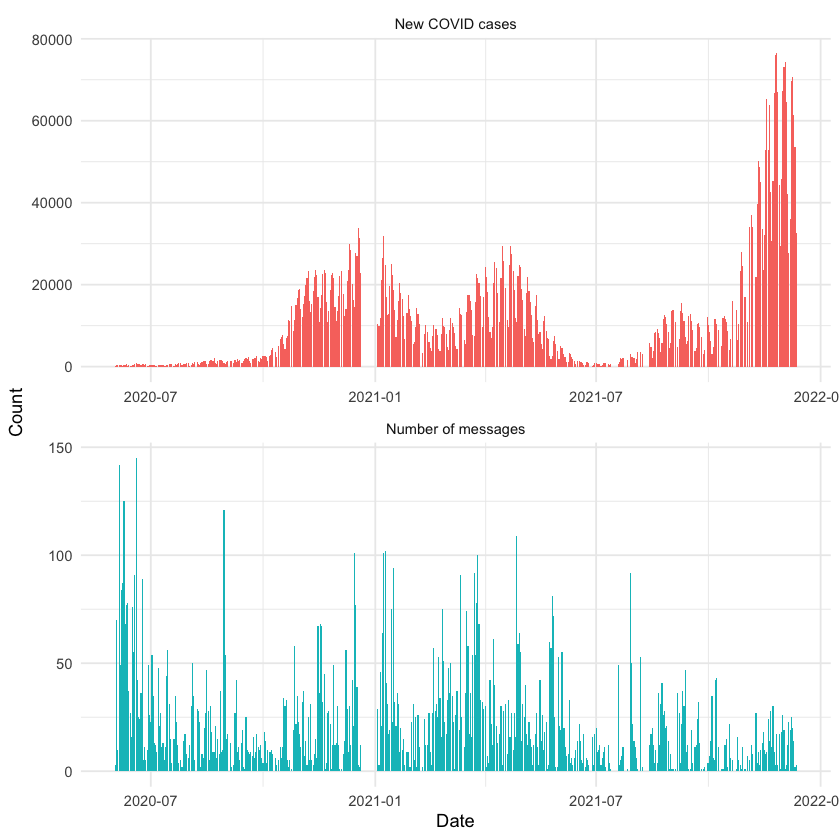

In [19]:
forum |>
    group_by(date) %>%
    count() %>%
    left_join(cvcase_inc %>% select(date, count), "date") %>%
    pivot_longer(-date) %>%
    mutate(name = if_else(name == "n", "Number of messages", "New COVID cases")) %>%
    ggplot() +
    geom_col(aes(date, value, fill = name)) +
    # geom_smooth(aes(date, value), method = "gam", formula = y ~ s(x, bs = "cs")) +
    facet_wrap(~name, 2, scales = "free") +
    coord_cartesian() +
    guides(fill = "none") +
    labs(x = "Date", y = "Count")

## Unique users

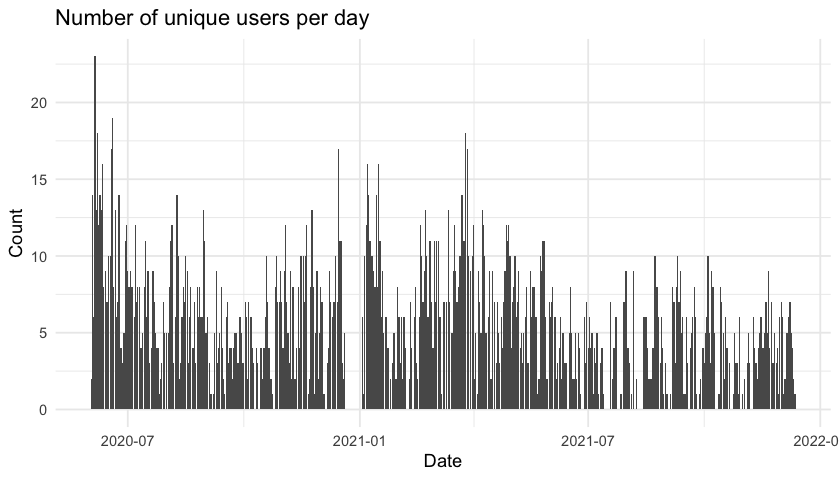

In [20]:
options(repr.plot.width = 7, repr.plot.height = 4)
forum %>%
    group_by(date) %>%
    distinct(user) %>%
    count() %>%
    ggplot() +
    geom_col(aes(date, n)) +
    labs(title = 'Number of unique users per day', x = 'Date', y = "Count")

## Life of a user

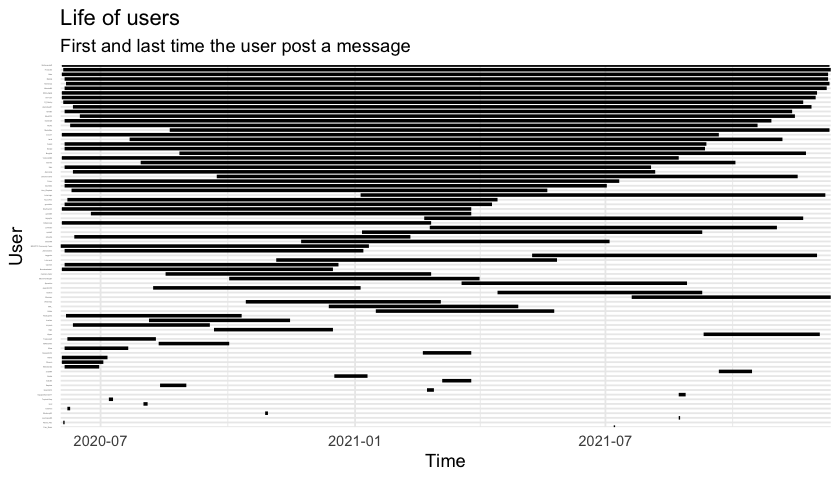

In [21]:
forum %>%
    group_by(user) %>%
    summarise(
        t0 = min(date),
        t1 = max(date),
        len = t1 - t0 + 1
    ) %>%
    filter(user != "Inaktiver User") %>%
        # arrange(desc(t0)) %>%
        # arrange(desc(len)) %>%
        filter(len > 1) %>%
        ggplot() +
        geom_linerange(aes(t0, reorder(user, len), xmin = t0, xmax = t1), size = 1) +
        coord_cartesian(expand = FALSE) +
        theme(
            axis.text.y = element_text(size = 1)
        ) +
        labs(
            title = "Life of users", 
            subtitle = "First and last time the user post a message",
            x = 'Time', 
            y = "User"
        )

## Most quoted messages

In [17]:
forum %>% count(quoted_text)

quoted_text,n
<chr>,<int>
"['- allerdings wären wir nicht auf die Idee gekommen, für eine Aktion z.B. mit einer Gruppe den öffentlichen Nahverkehr zu nutzen', 'Da unsere Kita sich nicht in Innenstadt-, sondern Randlage befindet, konnten wir also noch manches umsetzen.']",1
"['- Bitte verzichten Sie darauf, in diesem Forum weitere Themen über die bereits exstierenden zu veröffentlichen. Wir haben darauf geachtet, dass alle Bereiche in den vorgegebenen Diskussionen enthalten sind. Weitere Themen werden von den Moderatorinnen direkt gelöscht oder verschoben.']",1
"['- Der Test an der Grundschule ist die „2cm Version“, der am Gymnasium nicht. Da bin ich bei Blue, ich würde mir das nicht ohne Zögern regelmäßig antun wollen....Und da habe ich mich dann gerade beim Erstklässler schon gefragt, was das Testen in ihm auslöst.']",1
"['- Ehrlich, da kannste nur noch ""Egal""-Wendler-Song drauf hören. Ist doch irre, solche Kommentare.(Vor allem, wenn man bedenkt, dass dein Kind ein Viertklässler ist und ins Gymnasium kommen wird...).']",1
"['- Einstellung des öffentlichen kompletten Nah- und Fernverkehr, also Bus, Bahn, Flüge, Regionalbahnen etc.']",1
"['- ich gehöre jetzt echt nicht zu denen, die Kinder ständig und bei allem benachteiligt sehen, aber allmählich nehmen auch für mich die Aufreger ein wenig überhand.']",1
"['-----Hier gibt es Betreuungsangebote und wer berechtigt ist, sie in Anspruch zu nehmen, darf das tun - wie heute schon mal geschrieben wird in unserer Kita und Schule auch wirklich ausgestrahlt: ""wir freuen uns über alle Familien, die zurück sind"". Ehrlich gesagt finde ich den Gedanken etwas befremdlich, dass die Erzieherinen darüber urteilen, ob das, was wir als Familie entscheiden, nun angemessen ist, oder nicht......']",1
"['--> So wird das alles nix! Nach wie vor bei den Verantwortlichen keine Bereitschaft, vom typischen Schulsystem mal komplett abzuweichen und ganz was anderes aus zu probieren. Und selbst mit dem üblichen System gibt es für die allermeisten Schüler kein Konzept, wie es denn laufen könnte. Nach einem Jahr Pandemie hat sich kaum etwas getan bei Ausstattung mit Technik für Schulen, Lehrer und Schüler, um mit neuen Medien Fernunterricht vernünftig gestalten zu können und ebenso auch nicht mit Ausstattung der Schulen in Sachen Luftreiniger etc. Somit müsste Unterricht vor Ort in jedem Fall viel mehr Zeit in Lüfterei (Fenster auf/Durchzug wenn ein Lüftchen weht sonst Ventilator an, wenn vorhanden) investieren als in reine Unterrichtszeit. Lehrer und Schüler brauchen ja auch Zeit, wo man die Maske mal von der Nase nimmt, um richtig durch zu atmen, weil es einem sonst duselig im Hirn wird.Von Arbeitskollegen hörte ich, dass es mit möglichen Schnelltests in so mancher Kita/Grundschule auch nicht wirklich klapptAlso wird groß getönt von Schnelltests/Selbsttests für alle, wunderbare Öffnungen in allen möglichen Bereichen...aber die Rahmenbedingungen dafür sind gar nicht geschaffen...aber anders herum dürfen Bereiche, die bereits funktionierende Konzepte samt passender Ausstattung (wie z.B. Musseum mit Klimanalage, Hygienekonzept und bereits erprobter, funktionierender Besucherbeschränkung durch Terminvergabe online) nicht den Betrieb aufnehmen']",1
"['-von mir gekürzt-Zum Impfen, und ich betone es nochmal: ich bin da derselben Meinung wie ihr, aber ich bin ebenso fest davon überzeugt, dass im Herbst/Winter wieder irgendwelche Argumente für im besten Fall Wechselunterricht bzw. wieder Schulschließungen gefunden werden, sollten Inzidenzen steigen. Von Kitas will ich gar nicht erst anfangen.']",1


## Network

- we want to see replies to a message
- every next message is a reply to previous message

> The issue is forum does not have network but sequential

In [18]:
sizing(7, 7)
# Document features
dfmat <- tokens(forum$text, remove_punct = TRUE, remove_numbers = TRUE, remove_symbols = TRUE, remove_url = T) %>%
    tokens_remove(stopwords("de", source = "stopwords-iso")) %>%
    dfm()

library("quanteda.textplots")

#' ## Word clouds
textplot_wordcloud(dfmat,
    min_count = 500, random_order = FALSE, rotation = 0.25,
    color = RColorBrewer::brewer.pal(8, "Dark2")
)

dfmat %>%
    dfm_trim(max_termfreq = 499) |>
    textplot_wordcloud(
        min_count = 100, max_words = 100, random_order = FALSE, rotation = 0.25,
        min_size = .5, max_size = 2,
        color = RColorBrewer::brewer.pal(8, "Dark2")
    )

Warning message:
“NA is replaced by empty string”


ERROR: Error in library("quanteda.textplots"): there is no package called ‘quanteda.textplots’


In [ ]:
#' ## Word counts
#+ word_count_table, results = 'asis', include=TRUE
topfeatures(dfmat, 1000) %>%
    tibble(n = ., word = names(.)) %>%
    arrange(desc(n)) %>%
    knitr::kable(caption='\\label{tab:word_count}Word count')



In [80]:
forum %<>%
    rename(id = X1) %>% 
    mutate(id = gsub('post_message_', '', mid)) %>% 
    arrange(id)
names(forum)

[1] "id"          "user"        "date"        "time"        "mid"        
[6] "text"        "emoji"       "user_quoted" "quoted_text"

In [81]:
# Document features
tk <- tokens(
    forum$text, 
    remove_punct = TRUE, 
    remove_numbers = TRUE, 
    remove_symbols = TRUE, 
    remove_url = T
) %>%
    tokens_remove(stopwords("de", source = "stopwords-iso"))

tk <- lapply(tk, function(x) tolower(x)) %>% as.tokens()

# Docuement features matrix
dfmat <- dfm(tk)

Warning message:
"NA is replaced by empty string"


Token long form

In [82]:
tk_long <- purrr::map_dfr(
    names(tk), 
    function(x) bind_cols(text = x, as_tibble(tk[[x]])))

tk_long %>%
    rename(word = value) %>%  
    allot(tk_long)
saveRDS(tk_long, here('data', 'tk_long.rds'))

In [1]:

tk_long

ERROR: Error in eval(expr, envir, enclos): Objekt 'tk_long' nicht gefunden


# Astrid words

In [16]:
allgemein <- read_table(here('data', 'allgemein.txt'))
emotion <- read_table(here('data', 'emotion.txt'))


── Column specification ────────────────────────────────────────────────────────
cols(
  Allgemein = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  emotionen = col_character()
)




# SentiWords

In [25]:
read.csv(
    here("data/SentiWS_v1.8c/SentiWS_v1.8c_Positive.txt"),
    sep = "\t", header = FALSE
) %>%
    as_tibble() %>%
    mutate(V1 = gsub("\\|.*", "", V1)) %>%
    separate_rows(V3, sep = ",") %>%
    select(word = V3, score = V2) %>%
    mutate(word = tolower(word)) %>%
    filter(nchar(word) != 0) %>%
    mutate(word = gsub('<|>', '', word)) %>%
    allot(positive)

read.csv(
    here("data/SentiWS_v1.8c/SentiWS_v1.8c_Negative.txt"),
    sep = "\t", header = FALSE
) %>%
    as_tibble() %>%
    mutate(V1 = gsub("\\|.*", "", V1)) %>%
    separate_rows(V3, sep = ",") %>%
    select(word = V3, score = V2) %>%
    mutate(word = tolower(word)) %>%
    filter(nchar(word) != 0) %>%
    mutate(word = gsub('<|>', '', word)) %>%
    allot(negative)

# General positive/negative

Positive by text and date

In [26]:
options(repr.plot.width = 7, repr.plot.height = 4)
tk_long %>%
    left_join(positive) %>%
    filter(!is.na(score)) %>%
    group_by(text) %>%
    summarise(score = mean(score)) %>%
    left_join(forum_meta) %>%
    group_by(date) %>%
    summarise(score = mean(score)) %>%
    allot(pos_by_txt_date)
tk_long %>%
    left_join(negative) %>%
    filter(!is.na(score)) %>%
    group_by(text) %>%
    summarise(score = mean(score)) %>%
    left_join(forum_meta) %>%
    group_by(date) %>%
    summarise(score = mean(score)) %>%
    allot(neg_by_txt_date)

Joining, by = "word"

Joining, by = "text"

Joining, by = "word"

Joining, by = "text"



In [27]:
hcl.pals('qual')

[1] "Pastel 1" "Dark 2"   "Dark 3"   "Set 2"    "Set 3"    "Warm"     "Cold"    
[8] "Harmonic" "Dynamic"

## Sentiment by date

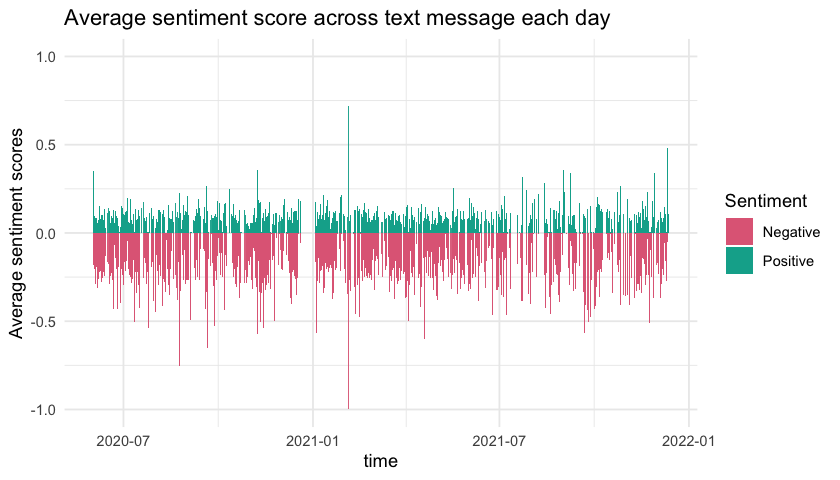

In [28]:
pos_by_txt_date %>%
    bind_rows(neg_by_txt_date, .id = "senti") %>%
    mutate(senti = char(pos, neg)[as.numeric(senti)]) %>%
    ggplot() +
    geom_col(aes(date, score, fill = senti)) +
    coord_cartesian(ylim = c(-1, 1)) +
    labs(
        title = "Average sentiment score across text message each day",
        x = "time",
        y = "Average sentiment scores",
        fill = "Sentiment"
    ) +
    scale_fill_manual(values = hcl.colors(2, 'Dark 3'), labels = char(Negative, Positive))

In [45]:
np <- forum %>% group_by(date) %>% count()

In [32]:
glimpse(pos_by_txt_date)
glimpse(pos_by_txt_date)

Rows: 464
Columns: 2
$ date  <date> 2020-06-02, 2020-06-03, 2020-06-04, 2020-06-05, 2020-06-06, 202…
$ score <dbl> 0.35097222, 0.09786368, 0.08490833, 0.08339843, 0.05456326, 0.07…


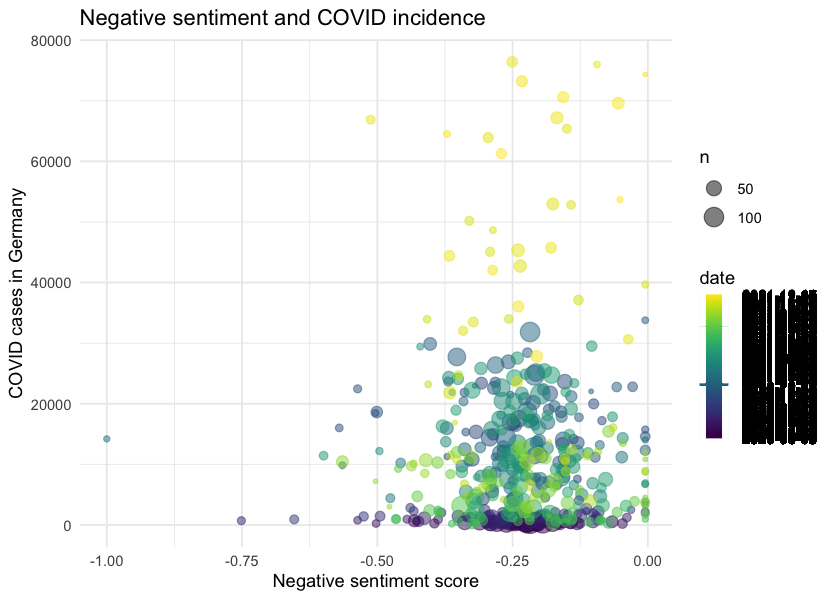

In [59]:
library(ggplot2)
# pos_by_txt_date %>%
    # bind_rows(neg_by_txt_date, .id = "senti") %>%
sizing(7,5)
neg_by_txt_date %>%
    # mutate(senti = char(pos, neg)[as.numeric(senti)]) %>%
    left_join(cvcase_inc %>% select(date, count), "date") %>%
    left_join(np, "date") %>%
    ggplot() +
    geom_point(aes(score, count, size = n, color = date), alpha = .5) +
    labs(title = 'Negative sentiment and COVID incidence', x = "Negative sentiment score", y = "COVID cases in Germany") +
    viridis::scale_color_viridis(breaks = forum$date, labels = forum$date)

Most negative text

In [61]:
tk_long %>%
    left_join(positive) %>%
    filter(!is.na(score)) %>%
    group_by(text) %>%
    summarise(ss = sum(score)) %>%
    arrange(desc(ss)) %>%
    # arrange(ss) %>%
    head() %>%
    mutate(rid = gsub("text([0-9]*)", "\\1", text), rid = as.numeric(rid)) %>%
    pull(rid) %>%
    allot(rid)

Joining, by = "word"



## Sentiment by users

In [20]:
forum_meta %>% head

id,user,date,text
<chr>,<chr>,<date>,<chr>
34705014,BRIGITTE Community-Team,2020-06-02,text1
34705172,BRIGITTE Community-Team,2020-06-02,text2
34705352,Inaktiver User,2020-06-02,text3
34705824,Marta-Agata,2020-06-03,text4
34705866,macaronesia,2020-06-03,text5
34705870,Rotfuchs,2020-06-03,text6


In [38]:
tk_long %>%
    left_join(positive) %>%
    filter(!is.na(score)) %>%
    group_by(text) %>%
    summarise(score = mean(score)) %>%
    left_join(forum_meta) %>%
    group_by(user) %>%
    summarise(score = sum(score)) %>%
    allot(user_pos_sent)
tk_long %>%
    left_join(negative) %>%
    filter(!is.na(score)) %>%
    group_by(text) %>%
    summarise(score = mean(score)) %>%
    left_join(forum_meta) %>%
    group_by(user) %>%
    summarise(score = sum(score)) %>%
    allot(user_neg_sent)

Joining, by = "word"

Joining, by = "text"

Joining, by = "word"

Joining, by = "text"



In [60]:
tk_long

text,word
<chr>,<chr>
text1,liebe
text1,user
text1,innen
text1,fragen
text1,kinderbetreuung
text1,kitas
text1,home-schooling
text1,platz
text1,familienthemen


In [39]:
forum %>%
    count(user) %>%
    arrange(desc(n)) %>%
    allot(user_most_active)

In [68]:
user_pos_sent %>%
    bind_rows(user_neg_sent, .id = "sent") %>%
    left_join(user_most_active, "user") %>%
    pivot_wider(names_from = sent, values_from = score) %>%
    drop_na()

user,n,1,2
<chr>,<int>,<dbl>,<dbl>
Alaska,2,0.0040000,-0.2059000
Alemanita,204,10.7371828,-19.9490542
Allemann,69,4.6222500,-10.8342500
alles_anders,3,0.1219000,-0.5483000
allymcbeal31,37,0.8671000,-3.6631333
AZ87,1,0.2318000,-0.0167000
Bauschundbogen,7,0.2775667,-0.5658000
Bisasam,1,0.1769667,-0.2707000
Blue2012,312,13.7090783,-24.4429729


# co-ocurring

In [ ]:
co <- fcm(tk, context = 'document', count = 'boolean')
co

topic_and_emotion <- c(allgemein$Allgemein, emotion$emotionen) %>% tolower()
astrid_term <- fcm_select(co, topic_and_emotion)

astrid_term %>%
    convert("data.frame") %>%
    as_tibble() %>%
    select(doc_id, emotion$emotionen) %>%
    allot(astrid_topic_by_emotion

rmid <- astrid_topic_by_emotion %>% select(-doc_id) %>% rowSums() %>% `<`(100) %>% which

astrid_topic_by_emotion[-rmid, ] %>%
    pivot_longer(-doc_id, names_to = "emotion", values_to = "freq") %>%
    ggplot() +
    geom_tile(aes(emotion, doc_id, fill = freq)) +
    theme(axis.text.x = element_text(angle = 90), axis.text.y = element_text(size = 7)) +
    labs(title = "Co-occurence of topic and emotion frequency")

savePNG(here('fig/co-occurence'), 7, 7)

more selective

In [ ]:
astrid_topic_by_emotion %>%
    filter(doc_id %in% char(test, testen, maskenpflicht, masken, quarantäne)) %>%
    pivot_longer(-doc_id, names_to = "emotion", values_to = "freq") %>%
    ggplot() +
    geom_tile(aes(emotion, doc_id, fill = freq)) +
    theme(axis.text.x = element_text(angle = 90), axis.text.y = element_text(size = 7)) +
    labs(title = "Co-occurence of topic and emotion frequency")

savePNG(here("fig/co-occurence-selective"), 7, 4)

# Most talkative users

In [ ]:
forum %>% 
    group_by(user)  %>% 
    count() %>% 
    arrange(desc(n)) %>%
    filter(n > 100) %>%
    filter(user != 'Inaktiver User') %>%
    ggplot() + 
        geom_col(aes(user, n)) +
        coord_polar() +
        labs(title = "User with 100+ messages")

savePNG(here('fig', 'user100plus'), 7, 7)

# Word cloud

In [ ]:
#+ word_cloud_500p, fig.cap = 'Word clouds (500+)', include=TRUE
textplot_wordcloud(dfmat,
    min_count = 500, random_order = FALSE, rotation = 0.25,
    color = RColorBrewer::brewer.pal(8, "Dark2")
)

#' \newpage
#+ word_cloud_100_500, fig.cap = 'Word clouds (100-500)', include=TRUE
dfmat %>%
    dfm_trim(max_termfreq = 499) |>
    textplot_wordcloud(
        min_count = 100, max_words = 100, random_order = FALSE, rotation = 0.25,
        min_size = .5, max_size = 2,
        color = RColorBrewer::brewer.pal(8, "Dark2")
    )

#' ## Word counts
#+ word_count_table, results = 'asis', include=TRUE
topfeatures(dfmat, 1000) %>%
    tibble(n = ., word = names(.)) %>%
    arrange(desc(n)) %>%
    knitr::kable(caption='\\label{tab:word_count}Word count')

In [13]:
library(dplyr)
library(tidyr)
library(rnaturalearth)
library(rnaturalearthdata)
library(sf)
sf_use_s2(FALSE)
library(scatterpie)

Linking to GEOS 3.8.1, GDAL 3.2.1, PROJ 7.2.1



Spherical geometry (s2) switched off


In [24]:
# get maps
country <- ne_countries(
    scale = "small",
    type = "map_units",
    returnclass = "sf"
)
# get centroids to place the pie
latlong <- country %>%
    st_centroid() %>%
    st_coordinates() %>%
    as_tibble() %>%
    rename_with(~ c("long", "lat"))
# combine with coutry names and stuffs
mymap <- st_drop_geometry(country) %>%
    bind_cols(latlong) %>%
    select(long, lat, admin) %>%
    filter(!(admin == "United Kingdom" & lat < 56))
# add centroid coordinates to original data
dat <- mymap %>% right_join(ayten)
head(dat)

Warning message in st_centroid.sf(.):
"st_centroid assumes attributes are constant over geometries of x"
Warning message in st_centroid.sfc(st_geometry(x), of_largest_polygon = of_largest_polygon):
"st_centroid does not give correct centroids for longitude/latitude data"
Joining, by = "admin"



,long,lat,admin,Spinal,TMB,OST,Other,total
,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>
1,10.288485,51.13372,Germany,2,1,2,2,7
2,-4.111565,56.66954,United Kingdom,1,0,1,3,5
3,106.285841,16.65794,Vietnam,3,2,3,1,9
